# Clock model example

In this example, we are studying the superconducting qubit model for a quantum clock. The only issue I can see is the fact that we look at the FHT of the angle and not the direct measurement output. 

Maybe all hope isn't lost. We could actually seek to show that the SNR of the FPT has a minimum corresponding to the optimal measurement stregth trading off between measurement back action and the SNR. 

In [167]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
from _funcs import *

import seaborn as sns
plt.rc('text', usetex=True)
sns.set()

def get_first_hit(array, x):
    # create a function that returs first hitting time of array >= x
    try: 
        return np.min(np.where(array>=x))
    except ValueError:
        return None

In [234]:
# Parameters
Gamma = 0.5
Omega = 0.5
dt = 0.01
tf = 50
t = np.arange(0, tf, dt)

# Define system operators
sp = sigmap()
sm = sigmam()
sx = sigmax()
sz = sigmaz()
H = Omega*sx

# define dissipator and Hamiltonian
c_ops = [np.sqrt(Gamma) * sp*sm]    

# steadystate
rho0 = fock(2, 1)

In [235]:
result = ssesolve(H, rho0, t, sc_ops=c_ops, e_ops=[sp*sm], store_measurement=True, solver='euler')

Total run time:   0.03s


In [236]:
dW = result.noise.flatten()

In [237]:
# get measurement results
meas = np.real(result.measurement[0].T)[0]+ Gamma-.6
meas_int = dt*np.cumsum(meas)
ez = np.real(result.expect[0])
ez_int = dt*np.cumsum(ez)

sig =2*np.sqrt(Gamma)*(ez)+dW/dt

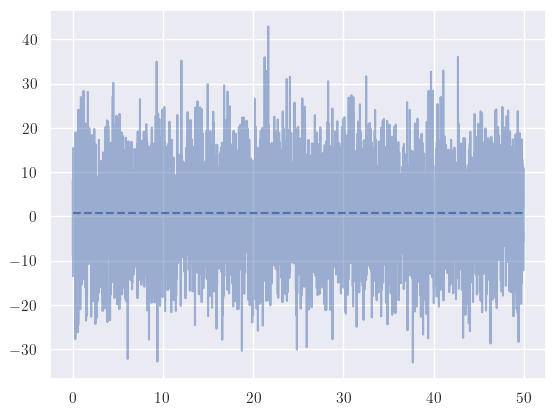

In [238]:
# plt.plot(t, meas, alpha=0.5, label='measurement')
plt.plot(t, sig, alpha=0.5, label='expectation')
plt.hlines(np.mean(meas), 0, tf, linestyles='dashed')
plt.show()

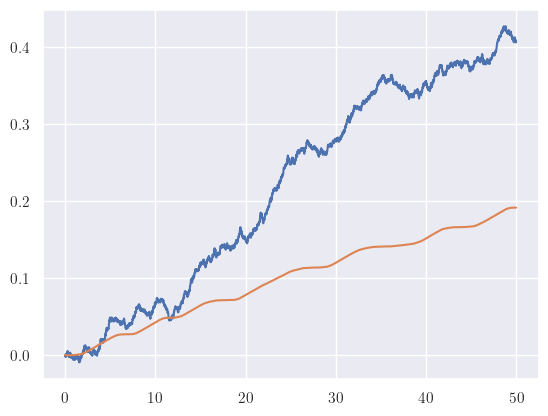

In [239]:
plt.plot(t, dt*np.cumsum(meas)*dt)
plt.plot(t, np.sqrt(Gamma)*dt*np.cumsum(ez)*dt)

# plt.ylim(0, 3)

plt.show()

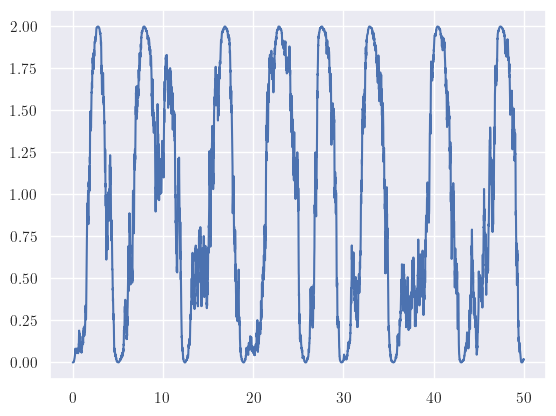

In [174]:
plt.plot(t, ez+1)
# plt.plot(t, -dt*np.cumsum(ez+1))

plt.show()

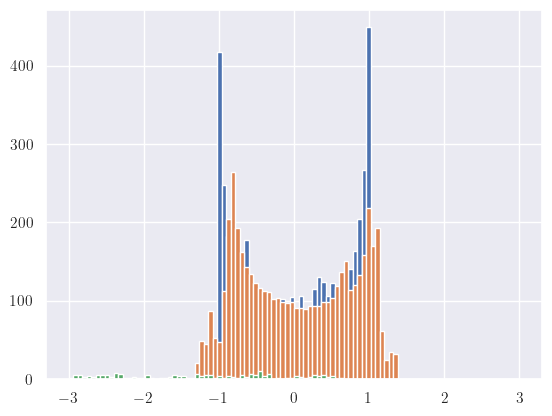

In [201]:
plt.hist(ez, bins=100, range=[-3,3])
plt.hist(ez_int, bins=100, range=[-3,3])
plt.hist(meas_int, bins=100, range=[-3,3])

plt.show()